# Smart_Stock Machine Learning

## Setup and Explore the data

In [134]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import ensemble
from sklearn.cluster import KMeans
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import hvplot.pandas

#  Import completed dataset
sp500_complete_df = pd.read_csv("data/sp500_complete.csv")
sp500_complete_df.head()

,Ticker,Year,Year_Open,Year_High,Year_Low,Year_Close,Year_Volume,Stock_CAGR,SP500_Open,SP500_High,...,UnemploymentRate,GICS Sector,GICS Sub-Industry,Headquarters Location,Date Added,Founded,CEO Name,Gender,Salary,Date Announced as CEO
0,A,2015,41.180000,43.590000,33.119999,41.810001,645291900,0.015299,2058.90,2134.72,...,5.3,Health Care,Life Sciences Tools & Services,"Santa Clara, California",2000-06-05,1999,Michael McMullen,M,"$16,647,413.00",2015-03-18
1,A,2016,41.060001,48.630001,34.150002,45.560001,524933400,0.109596,2038.20,2277.53,...,4.9,Health Care,Life Sciences Tools & Services,"Santa Clara, California",2000-06-05,1999,Michael McMullen,M,"$16,647,413.00",2015-03-18
2,A,2017,45.930000,70.930000,45.740002,66.970001,464585300,0.458088,2251.57,2694.97,...,4.4,Health Care,Life Sciences Tools & Services,"Santa Clara, California",2000-06-05,1999,Michael McMullen,M,"$16,647,413.00",2015-03-18
3,A,2018,67.419998,75.110001,60.419998,67.459999,650604400,0.000593,2683.73,2940.91,...,3.9,Health Care,Life Sciences Tools & Services,"Santa Clara, California",2000-06-05,1999,Michael McMullen,M,"$16,647,413.00",2015-03-18
4,A,2019,66.500000,85.680000,62.000000,85.309998,543573000,0.282857,2476.96,3247.93,...,3.7,Health Care,Life Sciences Tools & Services,"Santa Clara, California",2000-06-05,1999,Michael McMullen,M,"$16,647,413.00",2015-03-18


In [110]:
# View data info
sp500_complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370 entries, 0 to 4369
Data columns (total 26 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Ticker                                        4370 non-null   object 
 1   Year                                          4370 non-null   int64  
 2   Year_Open                                     4370 non-null   float64
 3   Year_High                                     4370 non-null   float64
 4   Year_Low                                      4370 non-null   float64
 5   Year_Close                                    4370 non-null   float64
 6   Year_Volume                                   4370 non-null   int64  
 7   Stock_CAGR                                    4370 non-null   float64
 8   SP500_Open                                    4370 non-null   float64
 9   SP500_High                                    4370 non-null   f

In [111]:
# Determine the number of unique values in each column.
sp500_complete_df.nunique()

Ticker                                           495
Year                                               9
Year_Open                                       3990
Year_High                                       4040
Year_Low                                        3942
Year_Close                                      4018
Year_Volume                                     4367
Stock_CAGR                                      4370
SP500_Open                                         9
SP500_High                                         9
SP500_Low                                          9
SP500_Close                                        9
SP500_CAGR                                         9
Outperformed?                                      2
Interest Rate (Federal Funds Effective Rate)       9
CPI                                                9
UnemploymentRate                                   9
GICS Sector                                       11
GICS Sub-Industry                             

In [112]:
# Show data columns
sp500_complete_df.columns

Index(['Ticker', 'Year', 'Year_Open', 'Year_High', 'Year_Low', 'Year_Close',
       'Year_Volume', 'Stock_CAGR', 'SP500_Open', 'SP500_High', 'SP500_Low',
       'SP500_Close', 'SP500_CAGR', 'Outperformed?',
       'Interest Rate (Federal Funds Effective Rate)', 'CPI',
       'UnemploymentRate', 'GICS Sector', 'GICS Sub-Industry',
       'Headquarters Location', 'Date Added', 'Founded', 'CEO Name', 'Gender',
       'Salary', 'Date Announced as CEO'],
      dtype='object')

## Unsupervised learning: K-Means

### Preprocessing

In [231]:
# Scale numeric values
sp500_scaled = StandardScaler().fit_transform(
    sp500_complete_df[['Year', 'Year_Open', 'Year_High', 'Year_Low', 'Year_Close',
       'Year_Volume', 'Stock_CAGR', 'SP500_Open', 'SP500_High', 'SP500_Low',
       'SP500_Close', 'SP500_CAGR', 'Outperformed?',
       'Interest Rate (Federal Funds Effective Rate)', 'CPI',
       'UnemploymentRate']]
)

In [232]:
# Create a DataFrame with the scaled data
sp500_scaled_df = pd.DataFrame(
    sp500_scaled,
    columns=['Year', 'Year_Open', 'Year_High', 'Year_Low', 'Year_Close',
       'Year_Volume', 'Stock_CAGR', 'SP500_Open', 'SP500_High', 'SP500_Low',
       'SP500_Close', 'SP500_CAGR', 'Outperformed?',
       'Interest Rate (Federal Funds Effective Rate)', 'CPI',
       'UnemploymentRate']
)

# Copy the tickers names from the original data
sp500_scaled_df["Ticker"] = sp500_complete_df["Ticker"]
# # Set the Ticker column as index
sp500_scaled_df = sp500_scaled_df.set_index("Ticker")

# # Display sample data
sp500_scaled_df

,Year,Year_Open,Year_High,Year_Low,Year_Close,Year_Volume,Stock_CAGR,SP500_Open,SP500_High,SP500_Low,SP500_Close,SP500_CAGR,Outperformed?,Interest Rate (Federal Funds Effective Rate),CPI,UnemploymentRate
Ticker,,,,,,,,,,,,,,,,
A,-1.564333,-0.367884,-0.395954,-0.371077,-0.365090,-0.145084,-0.336100,-1.075821,-1.334650,-1.074527,-1.316898,-0.736510,1.001374,-0.830345,-1.199461,0.397717
A,-1.176709,-0.368452,-0.377442,-0.364933,-0.350037,-0.164418,-0.075502,-1.098815,-1.196176,-1.151735,-1.116833,-0.070787,1.001374,-0.659436,-0.661429,0.106237
A,-0.789085,-0.345419,-0.295535,-0.295797,-0.264100,-0.174111,0.887585,-0.861803,-0.791407,-0.561542,-0.670509,0.489799,1.001374,-0.429080,-0.302741,-0.258113
A,-0.401461,-0.243780,-0.280182,-0.208229,-0.262133,-0.144231,-0.376739,-0.381760,-0.552933,-0.423907,-0.841697,-1.105850,1.001374,0.135663,-0.168233,-0.622463
A,-0.013837,-0.248132,-0.241359,-0.198804,-0.190485,-0.161423,0.403319,-0.611440,-0.255233,-0.291795,-0.098545,1.225994,-0.998628,0.871315,-0.437249,-0.768203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTS,-0.013837,-0.162952,-0.065130,-0.083258,-0.001672,-0.163352,1.186048,-0.611440,-0.255233,-0.291795,-0.098545,1.225994,1.001374,0.871315,-0.437249,-0.768203
ZTS,0.373786,0.061891,0.092734,-0.030944,0.131389,-0.166475,0.321672,0.241333,0.241487,-0.633812,0.440692,0.301923,1.001374,0.239694,-0.706265,2.438075
ZTS,0.761410,0.222460,0.359501,0.274890,0.446600,-0.179873,0.920670,0.818882,1.258382,1.361650,1.477622,0.984875,1.001374,-0.845207,0.862996,0.470587


In [245]:
# Select catagorical variables of interest
catagorical_variables = sp500_complete_df[['Ticker', 'GICS Sector', 'GICS Sub-Industry',
       'Headquarters Location', 'Founded', 'Gender']]

# Set ticker as index
catagorical_variables = catagorical_variables.set_index("Ticker")
catagorical_variables

,GICS Sector,GICS Sub-Industry,Headquarters Location,Founded,Gender
Ticker,,,,,
A,Health Care,Life Sciences Tools & Services,"Santa Clara, California",1999,M
A,Health Care,Life Sciences Tools & Services,"Santa Clara, California",1999,M
A,Health Care,Life Sciences Tools & Services,"Santa Clara, California",1999,M
A,Health Care,Life Sciences Tools & Services,"Santa Clara, California",1999,M
A,Health Care,Life Sciences Tools & Services,"Santa Clara, California",1999,M
...,...,...,...,...,...
ZTS,Health Care,Pharmaceuticals,"Parsippany, New Jersey",1952,F
ZTS,Health Care,Pharmaceuticals,"Parsippany, New Jersey",1952,F
ZTS,Health Care,Pharmaceuticals,"Parsippany, New Jersey",1952,F


In [246]:
# Encode catagorical variables
stock_dummies = pd.get_dummies(catagorical_variables, dtype=int)
stock_dummies

,GICS Sector_Communication Services,GICS Sector_Consumer Discretionary,GICS Sector_Consumer Staples,GICS Sector_Energy,GICS Sector_Financials,GICS Sector_Health Care,GICS Sector_Industrials,GICS Sector_Information Technology,GICS Sector_Materials,GICS Sector_Real Estate,...,Founded_2015,Founded_2016,Founded_2017,Founded_2018,Founded_2019,Founded_2020,Founded_2022,Founded_2023,Gender_F,Gender_M
Ticker,,,,,,,,,,,,,,,,,,,,,
A,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
A,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
A,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
A,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
A,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTS,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
ZTS,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
ZTS,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [247]:
# Concatenate the dummy variables with the scaled data DataFrame
sp500_clustering_df = pd.concat([sp500_scaled_df, stock_dummies], axis=1).drop('Gender_M', axis=1)
# Display data sample
sp500_clustering_df

,Year,Year_Open,Year_High,Year_Low,Year_Close,Year_Volume,Stock_CAGR,SP500_Open,SP500_High,SP500_Low,...,Founded_2014,Founded_2015,Founded_2016,Founded_2017,Founded_2018,Founded_2019,Founded_2020,Founded_2022,Founded_2023,Gender_F
Ticker,,,,,,,,,,,,,,,,,,,,,
A,-1.564333,-0.367884,-0.395954,-0.371077,-0.365090,-0.145084,-0.336100,-1.075821,-1.334650,-1.074527,...,0,0,0,0,0,0,0,0,0,0
A,-1.176709,-0.368452,-0.377442,-0.364933,-0.350037,-0.164418,-0.075502,-1.098815,-1.196176,-1.151735,...,0,0,0,0,0,0,0,0,0,0
A,-0.789085,-0.345419,-0.295535,-0.295797,-0.264100,-0.174111,0.887585,-0.861803,-0.791407,-0.561542,...,0,0,0,0,0,0,0,0,0,0
A,-0.401461,-0.243780,-0.280182,-0.208229,-0.262133,-0.144231,-0.376739,-0.381760,-0.552933,-0.423907,...,0,0,0,0,0,0,0,0,0,0
A,-0.013837,-0.248132,-0.241359,-0.198804,-0.190485,-0.161423,0.403319,-0.611440,-0.255233,-0.291795,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTS,-0.013837,-0.162952,-0.065130,-0.083258,-0.001672,-0.163352,1.186048,-0.611440,-0.255233,-0.291795,...,0,0,0,0,0,0,0,0,0,1
ZTS,0.373786,0.061891,0.092734,-0.030944,0.131389,-0.166475,0.321672,0.241333,0.241487,-0.633812,...,0,0,0,0,0,0,0,0,0,1
ZTS,0.761410,0.222460,0.359501,0.274890,0.446600,-0.179873,0.920670,0.818882,1.258382,1.361650,...,0,0,0,0,0,0,0,0,0,1


### Apply the Elbow method

In [248]:
# Create a a list to store inertia values
inertia = []

# Create a a list to store the values of k
k_values = list(range(1, 11))

# Create a for-loop where each value of k and evaluate using the K-means algorithm
for k in k_values:
    k_model = KMeans(n_clusters=k, random_state=78)
    k_model.fit(sp500_clustering_df)
    inertia.append(k_model.inertia_)

In [249]:
# Create a Dictionary that holds the list values for k and inertia
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame using the elbow_data Dictionary
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,87035.926316
1,2,66190.681731
2,3,62248.679863
3,4,57234.841692
4,5,47274.784217


In [250]:
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

### Create Clusters

In [251]:
# Initialize the K-Means model with n_clusters=2
model = KMeans(n_clusters=2)

In [252]:
# Fit the model sp500_scaled_df DataFrame
model.fit(sp500_clustering_df)

KMeans(n_clusters=2)

In [253]:
# Predict the model segments
stock_clusters = model.predict(sp500_clustering_df)

# View the stock segments
print(stock_clusters)

[0 0 0 ... 1 1 1]


In [254]:
# Create a new column in the DataFrame with the predicted clusters
sp500_clustering_df["StockCluster"] = stock_clusters

# Review the DataFrame
sp500_clustering_df.head()

,Year,Year_Open,Year_High,Year_Low,Year_Close,Year_Volume,Stock_CAGR,SP500_Open,SP500_High,SP500_Low,...,Founded_2015,Founded_2016,Founded_2017,Founded_2018,Founded_2019,Founded_2020,Founded_2022,Founded_2023,Gender_F,StockCluster
Ticker,,,,,,,,,,,,,,,,,,,,,
A,-1.564333,-0.367884,-0.395954,-0.371077,-0.365090,-0.145084,-0.336100,-1.075821,-1.334650,-1.074527,...,0,0,0,0,0,0,0,0,0,0
A,-1.176709,-0.368452,-0.377442,-0.364933,-0.350037,-0.164418,-0.075502,-1.098815,-1.196176,-1.151735,...,0,0,0,0,0,0,0,0,0,0
A,-0.789085,-0.345419,-0.295535,-0.295797,-0.264100,-0.174111,0.887585,-0.861803,-0.791407,-0.561542,...,0,0,0,0,0,0,0,0,0,0
A,-0.401461,-0.243780,-0.280182,-0.208229,-0.262133,-0.144231,-0.376739,-0.381760,-0.552933,-0.423907,...,0,0,0,0,0,0,0,0,0,0
A,-0.013837,-0.248132,-0.241359,-0.198804,-0.190485,-0.161423,0.403319,-0.611440,-0.255233,-0.291795,...,0,0,0,0,0,0,0,0,0,0


In [255]:
# Create a scatter plot
sp500_clustering_df.hvplot.scatter(
    x="Outperformed?",
    y="Gender_F",
    by="StockCluster",
    hover_cols = ["Ticker"], 
    title = "Scatter Plot by Stock Segment"
)

:NdOverlay   [StockCluster]
   :Scatter   [Outperformed?]   (Gender_F,Ticker)

In [258]:
sp500_clustering_df[["StockCluster", 'Gender_F']].value_counts()

StockCluster  Gender_F
0             0           2682
1             0           1386
0             1            199
1             1            103
Name: count, dtype: int64

In [9]:
# Possible TO DO's
#1.  Bucket salaries
#2.  Bucket fringe sectors and subsectors
#3. 

## Supervised learning: Classifiers and Neural Network

### Preprocessing

In [11]:
# Convert categorical data to numeric with `pd.get_dummies`
sp500_numeric_df = pd.get_dummies(sp500_complete_df, dtype=int)
sp500_numeric_df

,Year,Year_Open,Year_High,Year_Low,Year_Close,Year_Volume,Stock_CAGR,SP500_Open,SP500_High,SP500_Low,...,Date Announced as CEO_2024-04-16,Date Announced as CEO_2024-04-29,Date Announced as CEO_2024-04-30,Date Announced as CEO_2024-05-01,Date Announced as CEO_2024-05-18,Date Announced as CEO_2024-05-30,Date Announced as CEO_2024-06-18,Date Announced as CEO_2024-07-01,Date Announced as CEO_2024-08-01,Date Announced as CEO_2024-12-31
0,2015,41.180000,43.590000,33.119999,41.810001,645291900,0.015299,2058.90,2134.72,1867.01,...,0,0,0,0,0,0,0,0,0,0
1,2016,41.060001,48.630001,34.150002,45.560001,524933400,0.109596,2038.20,2277.53,1810.10,...,0,0,0,0,0,0,0,0,0,0
2,2017,45.930000,70.930000,45.740002,66.970001,464585300,0.458088,2251.57,2694.97,2245.13,...,0,0,0,0,0,0,0,0,0,0
3,2018,67.419998,75.110001,60.419998,67.459999,650604400,0.000593,2683.73,2940.91,2346.58,...,0,0,0,0,0,0,0,0,0,0
4,2019,66.500000,85.680000,62.000000,85.309998,543573000,0.282857,2476.96,3247.93,2443.96,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4365,2019,84.510002,133.660004,81.370003,132.350006,531567200,0.566087,2476.96,3247.93,2443.96,...,0,0,0,0,0,0,0,0,0,0
4366,2020,132.050003,176.639999,90.139999,165.500000,512124700,0.253313,3244.67,3760.20,2191.86,...,0,0,0,0,0,0,0,0,0,0
4367,2021,166.000000,249.270004,141.410004,244.029999,428719800,0.470060,3764.61,4808.93,3662.71,...,0,0,0,0,0,0,0,0,0,0
4368,2022,242.289993,243.240005,124.150002,146.550003,549233100,-0.395146,4778.14,4818.62,3491.58,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# Split the preprocessed data into features and target arrays
y = sp500_numeric_df['Outperformed?'].values
X = sp500_numeric_df.drop(columns=['Outperformed?'], axis=1).values
X_columns = sp500_numeric_df.drop(columns=['Outperformed?'], axis=1).columns

In [13]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler instance
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Classifier modeling

----------------------------------------------
Confusion Matrix: KNeighborsClassifier


,Predicted < SP500,Predicted > SP500
Actual < SP500,288,272
Actual > SP500,235,298


,precision,recall,f1-score,support
Less than SP500 CAGR,0.551,0.514,0.532,560.0
Outperformed SP500 CAGR,0.523,0.559,0.54,533.0
accuracy,,,0.536,
macro avg,0.537,0.537,0.536,1093.0
weighted avg,0.537,0.536,0.536,1093.0


KNeighborsClassifier does not have feature_importances_ attribute.
                                                          
----------------------------------------------
Confusion Matrix: ExtraTreesClassifier


,Predicted < SP500,Predicted > SP500
Actual < SP500,428,132
Actual > SP500,159,374


,precision,recall,f1-score,support
Less than SP500 CAGR,0.729,0.764,0.746,560.0
Outperformed SP500 CAGR,0.739,0.702,0.72,533.0
accuracy,,,0.734,
macro avg,0.734,0.733,0.733,1093.0
weighted avg,0.734,0.734,0.733,1093.0


Feature Importances for ExtraTreesClassifier:
0.112941: Stock_CAGR
0.018506: SP500_Open
0.016976: Year_Close
0.016424: SP500_CAGR
0.015848: Interest Rate (Federal Funds Effective Rate)
0.015484: SP500_Close
0.015229: SP500_Low
0.014476: Year_Open
0.014374: Year_Volume
0.014179: CPI
0.013781: SP500_High
0.013706: Year_High
0.013552: Year_Low
0.012947: Year
0.012354: UnemploymentRate
0.007661: GICS Sector_Information Technology
0.005040: GICS Sector_Utilities
0.004813: Date Added_1957-03-04
0.004291: GICS Sub-Industry_Application Software
0.004247: GICS Sector_Consumer Staples
0.003903: GICS Sector_Energy
0.003363: GICS Sub-Industry_Financial Exchanges & Data
0.003255: GICS Sector_Industrials
0.003153: GICS Sector_Real Estate
0.002942: GICS Sub-Industry_Asset Management & Custody Banks
0.002654: GICS Sub-Industry_Transaction & Payment Processing Services
0.002436: GICS Sector_Financials
0.002432: GICS Sub-Industry_Homebuilding
0.002368: GICS Sub-Industry_Semiconductors
0.002301: GICS Sub

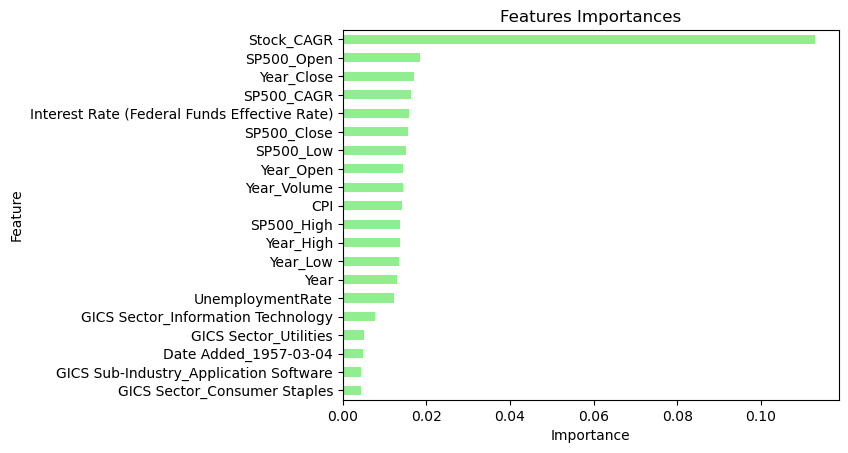

                                                          
----------------------------------------------
Confusion Matrix: LogisticsRegression


,Predicted < SP500,Predicted > SP500
Actual < SP500,505,55
Actual > SP500,56,477


,precision,recall,f1-score,support
Less than SP500 CAGR,0.9,0.902,0.901,560.0
Outperformed SP500 CAGR,0.897,0.895,0.896,533.0
accuracy,,,0.898,
macro avg,0.898,0.898,0.898,1093.0
weighted avg,0.898,0.898,0.898,1093.0


LogisticsRegression does not have feature_importances_ attribute.
                                                          
----------------------------------------------
Confusion Matrix: RandomForestClassifier


,Predicted < SP500,Predicted > SP500
Actual < SP500,537,23
Actual > SP500,37,496


,precision,recall,f1-score,support
Less than SP500 CAGR,0.936,0.959,0.947,560.0
Outperformed SP500 CAGR,0.956,0.931,0.943,533.0
accuracy,,,0.945,
macro avg,0.946,0.945,0.945,1093.0
weighted avg,0.945,0.945,0.945,1093.0


Feature Importances for RandomForestClassifier:
0.243686: Stock_CAGR
0.035785: Year_Close
0.030260: Year_Open
0.027277: Year_High
0.025639: Year_Low
0.022200: Year_Volume
0.019811: SP500_Close
0.016114: Interest Rate (Federal Funds Effective Rate)
0.015805: SP500_CAGR
0.014581: Year
0.014494: UnemploymentRate
0.013944: SP500_Open
0.013668: SP500_Low
0.013034: CPI
0.012149: SP500_High
0.006309: GICS Sector_Information Technology
0.003978: Date Added_1957-03-04
0.003311: GICS Sub-Industry_Application Software
0.002704: GICS Sector_Industrials
0.002671: GICS Sector_Consumer Staples
0.002617: GICS Sector_Utilities
0.002257: GICS Sub-Industry_Financial Exchanges & Data
0.001952: GICS Sector_Financials
0.001848: GICS Sub-Industry_Electric Utilities
0.001797: GICS Sector_Health Care
0.001736: GICS Sector_Consumer Discretionary
0.001627: GICS Sub-Industry_Asset Management & Custody Banks
0.001509: Headquarters Location_New York City, New York
0.001494: GICS Sector_Real Estate
0.001473: GICS Su

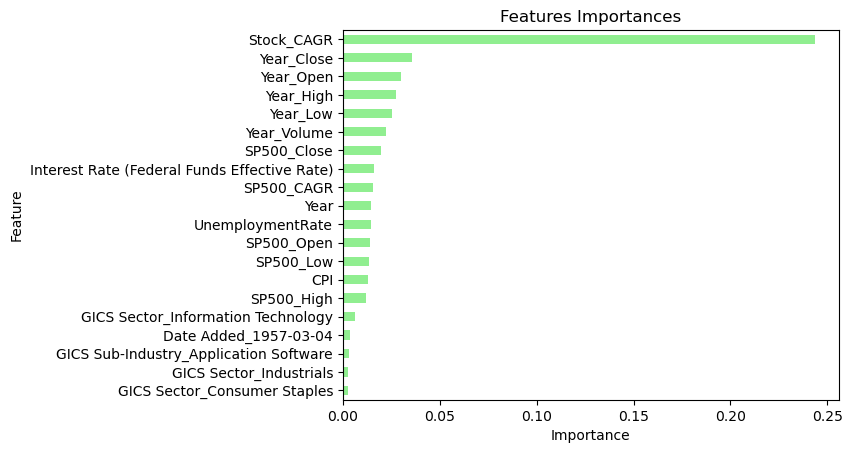

                                                          
----------------------------------------------
Confusion Matrix: BaggingClassifier


,Predicted < SP500,Predicted > SP500
Actual < SP500,559,1
Actual > SP500,2,531


,precision,recall,f1-score,support
Less than SP500 CAGR,0.996,0.998,0.997,560.0
Outperformed SP500 CAGR,0.998,0.996,0.997,533.0
accuracy,,,0.997,
macro avg,0.997,0.997,0.997,1093.0
weighted avg,0.997,0.997,0.997,1093.0


BaggingClassifier does not have feature_importances_ attribute.
                                                          
----------------------------------------------
Confusion Matrix: AdaBoostClassifier


,Predicted < SP500,Predicted > SP500
Actual < SP500,560,0
Actual > SP500,1,532


,precision,recall,f1-score,support
Less than SP500 CAGR,0.998,1.0,0.999,560.0
Outperformed SP500 CAGR,1.0,0.998,0.999,533.0
accuracy,,,0.999,
macro avg,0.999,0.999,0.999,1093.0
weighted avg,0.999,0.999,0.999,1093.0


Feature Importances for AdaBoostClassifier:
0.599898: Stock_CAGR
0.330725: SP500_CAGR
0.030343: SP500_High
0.026453: CPI
0.007058: Interest Rate (Federal Funds Effective Rate)
0.005524: SP500_Open


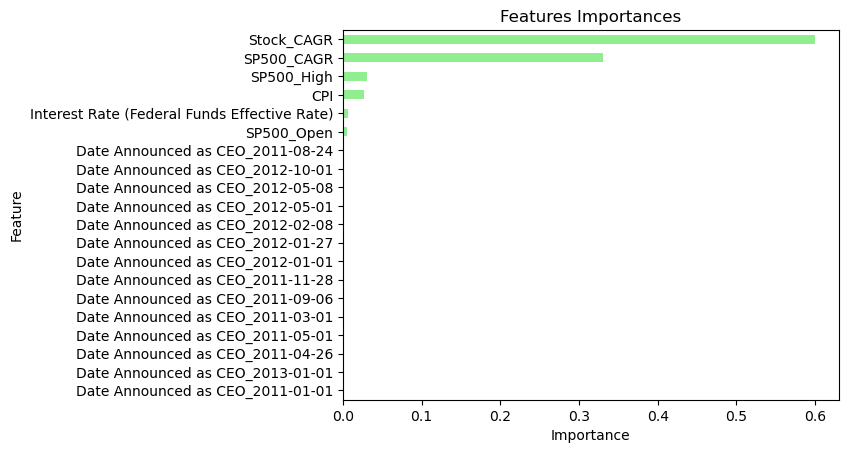

In [114]:
# Create a dictionary of different ml models to run in the loop
ml = {
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5),
    "ExtraTreesClassifier": ensemble.ExtraTreesClassifier(n_estimators=50, random_state=78),
    "LogisticsRegression": LogisticRegression(random_state=78, max_iter=1000),
    "RandomForestClassifier": ensemble.RandomForestClassifier(n_estimators=50, random_state=78),
    "BaggingClassifier": ensemble.BaggingClassifier(n_estimators=50, random_state=78),
    "AdaBoostClassifier": ensemble.AdaBoostClassifier(n_estimators=100, random_state=78, algorithm='SAMME') 
}
report_data = []

for x in ml:
    model = ml[x]
    model.fit(X_train_scaled, y_train)# Create predictions
    y_pred = model.predict(X_test_scaled)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    
    # Calculating the confusion matrix and display as a dataframe
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(
        cm, index=["Actual < SP500", "Actual > SP500"], columns=["Predicted < SP500", "Predicted > SP500"]
    )
    print(f"----------------------------------------------")
    print(f"Confusion Matrix: {x}")
    display(cm_df)
    
    # Calculate report metrics
    target_names = ["Less than SP500 CAGR", "Outperformed SP500 CAGR"]
    report = classification_report(y_test, y_pred, output_dict=True, target_names=target_names)
    results = {
        "Less than SP500 CAGR": report["Less than SP500 CAGR"],
        "Outperformed SP500 CAGR": report["Outperformed SP500 CAGR"],
        "accuracy": report["accuracy"],
        "macro avg": report["macro avg"],
        "weighted avg": report["weighted avg"]
    }
    # Save report results and display as a dataframe
    report_data.append({**results})
    results_df = pd.DataFrame(results).transpose().round(3)
    results_df = results_df.astype(object)
    results_df.loc["accuracy", results_df.columns != 'f1-score'] = ""
    display(results_df)
    
    # Check if the model has feature_importances_ attribute and print if true
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        feature_names = X_columns
        sorted_importances = sorted(zip(feature_importances, feature_names), reverse=True)
        
        print(f"Feature Importances for {x}:")
        for importance, name in sorted_importances:
            if importance >= 0.001:
                print(f"{importance:.6f}: {name}")
                
         # Visualize the features by importance
        importances_df = pd.DataFrame(sorted_importances)
        importances_df.set_index(importances_df[1], inplace=True)
        importances_df.drop(columns=1, inplace=True)
        importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
        importances_sorted_df = importances_df.sort_values(by='Feature Importances', ascending=False)
        top_importances_df = importances_sorted_df.head(20)
        ax = top_importances_df.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)
        ax.invert_yaxis()
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()
                
    else:
        print(f"{x} does not have feature_importances_ attribute.")
    print("                                                          ")

## Neural Network Modelling

### Test # 1

In [23]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  6
hidden_nodes_layer2 = 6

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

/Users/nicholaswiid/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 6)              │        16,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,729 (65.35 KB)

 Trainable params: 16,729 (65.35 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - accuracy: 0.5103 - loss: 0.7342
Epoch 2/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.6284 - loss: 0.6498
Epoch 3/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.6453 - loss: 0.6216
Epoch 4/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.6675 - loss: 0.6023
Epoch 5/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.6801 - loss: 0.5836
Epoch 6/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.6945 - loss: 0.5629
Epoch 7/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.7112 - loss: 0.5507
Epoch 8/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.7246 - loss: 0.5292
Epoch 9/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - accuracy: 0.7413 - loss: 0.5076
Epoch 10/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.7535 - loss: 0.4832
Epoch 11/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.7537 - loss: 0.4781
Epoch 12/100
103/10

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

35/35 - 0s - 3ms/step - accuracy: 0.8591 - loss: 0.6180
Loss: 0.6179528832435608, Accuracy: 0.8591033816337585


In [77]:
# Export the model to HDF5 file
nn.save("SP500_model.h5")

In [ ]:
# Export the model to keras file
from tensorflow.keras.saving import save_model

save_model(nn, 'SP500_model.keras')

### Test # 2

In [27]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 6

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 8)              │        22,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,301 (87.11 KB)

 Trainable params: 22,301 (87.11 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Compile the model
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [29]:
# Train the model
fit_model = nn2.fit(X_train_scaled,y_train,epochs=200)

Epoch 1/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 749us/step - accuracy: 0.5021 - loss: 0.8606
Epoch 2/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.6107 - loss: 0.6599
Epoch 3/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.6446 - loss: 0.6318
Epoch 4/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.6679 - loss: 0.6043
Epoch 5/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.6769 - loss: 0.5908
Epoch 6/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.6734 - loss: 0.5725
Epoch 7/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.7178 - loss: 0.5471
Epoch 8/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.7036 - loss: 0.5439
Epoch 9/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.7114 - loss: 0.5279
Epoch 10/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.7615 - loss: 0.4763
Epoch 11/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.7458 - loss: 0.4676
Epoch 12/200
103/10

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.9812 - loss: 0.0441
Epoch 133/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.9846 - loss: 0.0371 
Epoch 134/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.9831 - loss: 0.0419
Epoch 135/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.9739 - loss: 0.0617
Epoch 136/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.9806 - loss: 0.0519
Epoch 137/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.9846 - loss: 0.0327
Epoch 138/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.9759 - loss: 0.0538
Epoch 139/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.9787 - loss: 0.0475
Epoch 140/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.9838 - loss: 0.0408
Epoch 141/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.9858 - loss: 0.0355
Epoch 142/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.9778 - loss: 0.0468
Epoch 143/20

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

35/35 - 0s - 2ms/step - accuracy: 0.8152 - loss: 1.2393
Loss: 1.2393193244934082, Accuracy: 0.8151875734329224


### Test # 3

In [31]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 5
hidden_nodes_layer2 = 5
hidden_nodes_layer3 = 5

nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 5)              │        13,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,966 (54.55 KB)

 Trainable params: 13,966 (54.55 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Compile the model
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [33]:
# Train the model
fit_model = nn3.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - accuracy: 0.5176 - loss: 0.6921
Epoch 2/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.6006 - loss: 0.6802
Epoch 3/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.6148 - loss: 0.6648
Epoch 4/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.6538 - loss: 0.6459
Epoch 5/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.6692 - loss: 0.6322
Epoch 6/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.6802 - loss: 0.6233
Epoch 7/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.6991 - loss: 0.6034
Epoch 8/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.7151 - loss: 0.5946
Epoch 9/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.7231 - loss: 0.5691
Epoch 10/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.7372 - loss: 0.5496
Epoch 11/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.7523 - loss: 0.5331
Epoch 12/100
103/10

In [34]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

35/35 - 0s - 3ms/step - accuracy: 0.8481 - loss: 1.6579
Loss: 1.6578680276870728, Accuracy: 0.8481244444847107


## Optimize the model